до 14:00 15.07.2021


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

Датасет - каталог товара с данными во вложении

id: товар

Brand:Бренд

Category: категория

SubCategory: подкатегория

SellPrice: цена продажи


In [2]:
data = pd.read_csv('test_price.csv')
data.head()

,id,Brand,SubCategoryNr,Category,SellPrice
0,452798,79,3488,36,10.92
1,599859,79,1485,36,112.04
2,183475,79,1485,36,25.09
3,552471,79,3282,36,1.40
4,589285,79,3282,36,2.28


# 0. Описательная статистика

* Вывести самый частотный бренд, категорию, подкатегорию

*  Вывести по ним размах цен

*  Вывести Среднее значение или медиану (выбор обосновать)

In [336]:
# Вывести самый частотный бренд, категорию, подкатегорию
for feature in ['Brand', 'SubCategoryNr', 'Category']:
    top = data[feature].value_counts().rename_axis('unique_values').reset_index(name='counts')
    print('Самый частотный '+feature, 
          top['unique_values'].head(1).values[0],
          '-',top['counts'].head(1).values[0], 'шт', end='\n'*2)

Самый частотный Brand 369 - 40204 шт

Самый частотный SubCategoryNr 82 - 62711 шт

Самый частотный Category 13 - 200902 шт



In [36]:
# Вывести по ним размах цен
pop_feats_dict = {'Brand':369, 
                  'SubCategoryNr':82,
                  'Category':13}

for feature, value in pop_feats_dict.items():
    maxi = data.loc[data[feature]==value]['SellPrice'].max()
    mini = data.loc[data[feature]==value]['SellPrice'].min()
    print('Размах цен для',feature, value, '=', maxi-mini)
maxi

Размах цен для Brand 369 = 2712.32
Размах цен для SubCategoryNr 82 = 1207.98
Размах цен для Category 13 = 1735.56


1735.73

In [76]:
# Вывести Среднее значение или медиану (выбор обосновать)
# Медиана
# Проверим какую часть данных занимают значения близкие к максиаммльным.

for i in range(1, 10):
    q = data.loc[data['Category']==13]['SellPrice'].quantile(i/100)
    print(i,'% <', q)
print()    
for i in range(90, 100):
    q = data.loc[data['Category']==13]['SellPrice'].quantile(i/100)
    print(i, '% <', q)
    
print('Медиана ', data.loc[data['Category']==13]['SellPrice'].median())

data.loc[data['Category']==13].describe()

1 % < 4.24
2 % < 5.54
3 % < 6.48
4 % < 7.27
5 % < 7.96
6 % < 8.500599999999995
7 % < 9.02
8 % < 9.45
9 % < 9.84

90 % < 74.18
91 % < 78.1
92 % < 82.4
93 % < 87.35
94 % < 93.22
95 % < 100.78899999999965
96 % < 110.79
97 % < 123.01910000000004
98 % < 138.60960000000023
99 % < 176.25
Медиана  26.03


,id,Brand,SubCategoryNr,Category,SellPrice
count,200902.000000,200902.000000,200902.000000,200902.0,200902.000000
mean,310128.487671,90.099262,260.179331,13.0,36.585713
std,201956.019929,89.330045,323.029885,0.0,35.615731
min,1.000000,1.000000,54.000000,13.0,0.170000
25%,113171.250000,22.000000,82.000000,13.0,16.420000
50%,312889.500000,79.000000,123.000000,13.0,26.030000
75%,488096.750000,107.000000,402.000000,13.0,43.840000
max,671998.000000,369.000000,5213.000000,13.0,1735.730000


Будем использовать медиану, так как есть совсем редкие выбросы с аномальными значениями (например 0.17, 1735).
Т.е. Большинство данных лежит в пределах от 4 до 176. Поэтому среднее значениее большее медианы. Медиана устойчива к редким выбросам. 


# 1. Сделать график Распределения иерархий(бренд, категория, подкатегория) по ценам

• Распределение (средняя цена / бренд) - берем топ 25-35 брендов

• Распределение (средняя цена / категория) берем топ 25-35 категорий

• Распределение (средняя цена / подкатегория) берем топ 25-35 подкатегорий

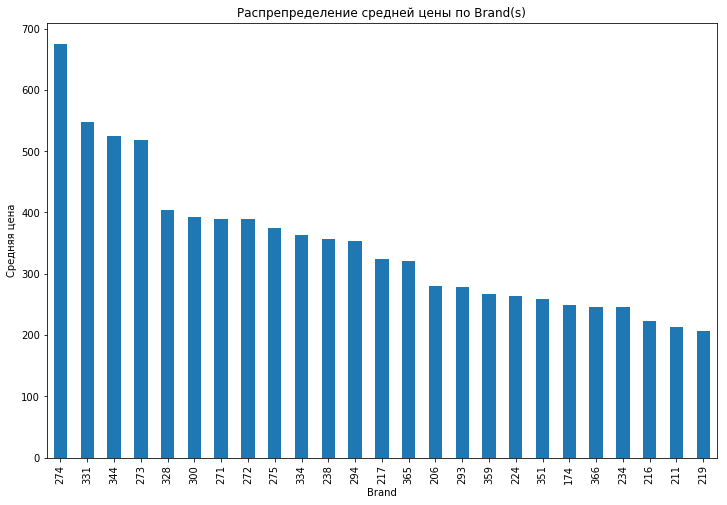

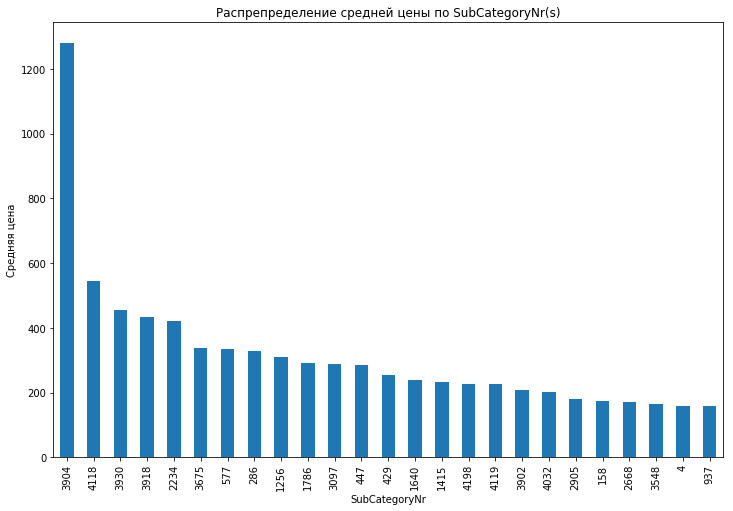

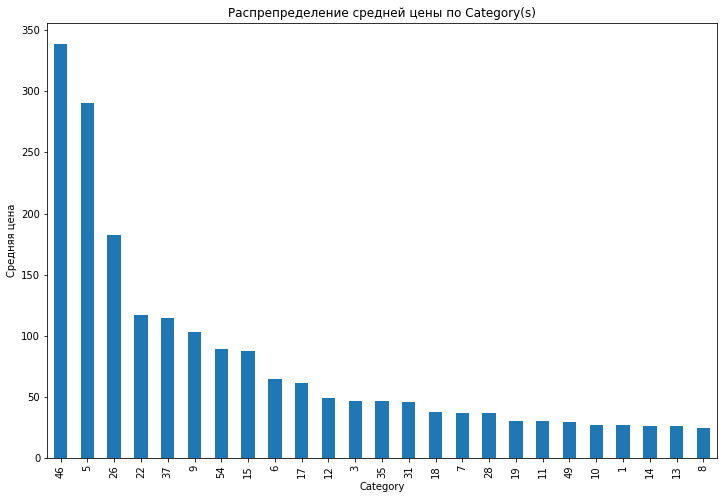

In [181]:
top = 25
for feat in pop_feats_dict: 
    top_brands_mean_prices = data.groupby([feat], sort=False)['SellPrice'].median().sort_values(ascending=False)[:top]
    plt.figure(figsize=(12, 8))
    ax = top_brands_mean_prices.plot(kind='bar')
    ax.set_title('Распрепределение средней цены по '+feat+'(s)')
    ax.set_xlabel(feat)
    ax.set_ylabel('Cредняя цена')
    ax.set_xticklabels(top_brands_mean_prices.keys())

# 2. Построить диаграмму размаха boxplot иерархий по ценам

Также как в задание выше (бренд, категория, подкатегория)

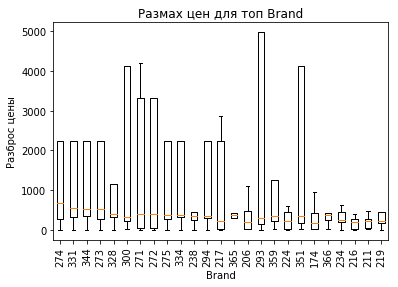

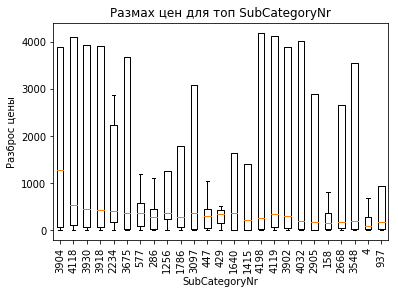

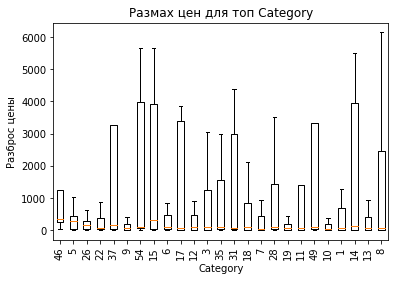

In [208]:
top = 25
for feat in pop_feats_dict: 
    top_brands_mean_prices = data.groupby([feat], sort=False)['SellPrice'].median().sort_values(ascending=False)[:top]
    arr = []
    for value in top_brands_mean_prices.keys():
        arr.append(data.loc[data[feat] == value].values)
    plt.boxplot(arr, labels=top_brands_mean_prices.keys(), showfliers=False)
    plt.title('Размах цен для топ '+str(feat))
    plt.xticks(rotation=90)
    plt.xlabel(str(feat))
    plt.ylabel('Разброс цены')

    plt.show()


# 3. Построить распределение интервалов цен по самому частотному бренду, категории, подкатегории (шаг интервала обосновать)


Выберем такой шаг для распределения, чтобы гистограмма была максимально гладкая. При слишком большом шаге интервалы будут большие и гистограммма получится грубой. При совсем маленьком шаге, могут быть пустые интервалы.

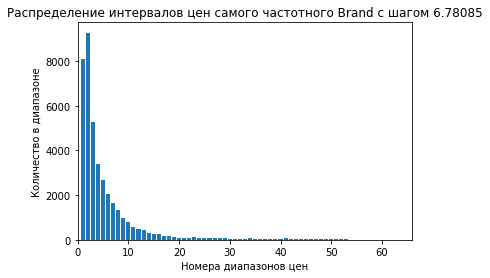

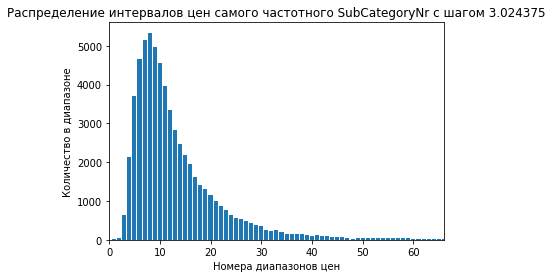

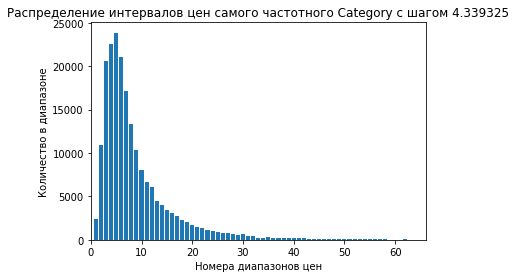

In [297]:
n =  400 #количество диапазонов
start = 0
mini = data.loc[data['Brand']==369, 'SellPrice'].min()
maxi = data.loc[data['Brand']==369, 'SellPrice'].max()
for feat, value in pop_feats_dict.items():
    lens = []
    start = 0
    mini = data.loc[data[feat]==value, 'SellPrice'].min()
    maxi = data.loc[data[feat]==value, 'SellPrice'].max()
    
    for stop in np.linspace(mini, maxi, n):

        l = data.loc[(data[feat]==value) & (data['SellPrice']> start) & (data['SellPrice']<stop),
                     'SellPrice'].shape[0]
        lens.append(l)
        start = stop

    plt.bar(range(n), lens)
    plt.title('Распределение интервалов цен самого частотного '+feat+' с шагом '+str(maxi/n))
    plt.xlabel('Номера диапазонов цен')
    plt.ylabel('Количество в диапазоне')
    plt.xlim(0, int(n/6))
    
    plt.show()
# print(lens[:150])

Задана граница в номере диапазонов цен, для лучшего вида формы распределения. Распределения цен схожи с распределением Фишера. 

Также похоже на распределения Паскаля, Геометрическое, Хи-квадрат. 

# 4. Сделать сегментацию по уровням цен по иерархии (внутри Brand/Category/SubCategory)

Сделаем сегементацию на 4 класса, ссылаясь на предыдущее задание. Будем иметь в виду, что:
0. Цены на товары низко-ценового сегмента находятся на уровне ниже средней розничной цены по рынку
1. Уровень цен товаров средне-ценового сегмента находится на уровне средней цены по рынку. Обычно максиамльное количество. 
2. Уровень цен товаров высоко-ценового сегмента выше средней цены по рынку
3. Уровень цен товаров премиум или luxury сегмента значимо выше средней цены по рынку. Обычно минимально количество. 



Построим распределение цен.  Границами сегментов обозначим квантили 0.3б, 0.6, 0.98. Цветом обозначим принадлежность сегменту:
 1. красный - низко-ценовой,
 2. желтый - средне-ценовой, 
 3. зеленый - высокий, 
 4. синий - премиум.


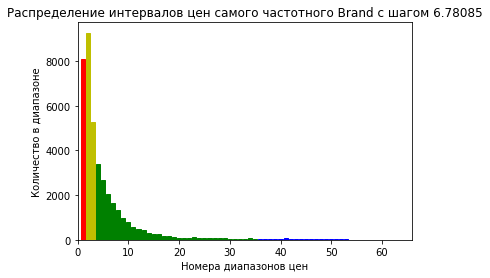

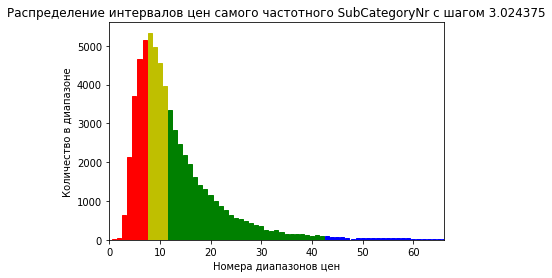

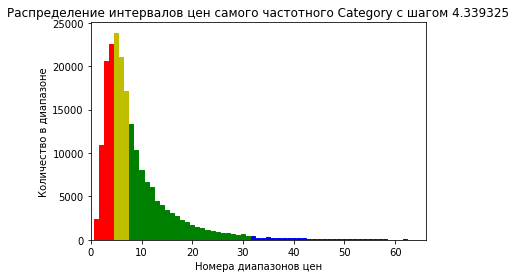

In [341]:
n=400 #количество диапазонов

for feat, value in pop_feats_dict.items():
    lens = []
    colors = []
    start = 0
    mini = data.loc[data[feat]==value, 'SellPrice'].min()
    maxi = data.loc[data[feat]==value, 'SellPrice'].max()
    
    low_border = data.loc[data[feat]==value, 'SellPrice'].quantile(0.3)
    mid_border = data.loc[data[feat]==value, 'SellPrice'].quantile(0.6)
    high_border = data.loc[data[feat]==value, 'SellPrice'].quantile(0.98)
    
    start = 0
    for i, stop in enumerate(np.linspace(mini, maxi, n)):
        count = data.loc[(data[feat]==value) & (data['SellPrice']> start) & (data['SellPrice']<stop),
                     'SellPrice'].shape[0]
        if stop < low_border:
            colors.append('r')
        elif stop < mid_border:
            colors.append('y')
        elif stop < high_border:
            colors.append('g')
        else:
            colors.append('b')
            
        lens.append(count)
        start = stop

    barlist = plt.bar(range(n), lens)
    for i in range(len(colors)):
        barlist[i].set_color(colors[i])

    plt.title('Распределение интервалов цен самого частотного '+feat+' с шагом '+str(maxi/n))
    plt.xlabel('Номера диапазонов цен')
    plt.ylabel('Количество в диапазоне')
    plt.xlim(0, int(n/6))

    plt.show()
